In [173]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [174]:
# Заданные параметры для 9 варианта
a = - 4
sigma2 = 6
std_sigma = np.sqrt(sigma2)
gamma = 0.90
n = 17
M = 1800

# 1 Моделирование выборки из n независимых наблюдений

In [175]:
sample = np.random.normal(loc = a, scale = std_sigma, size = n)
print(sample)

[ -3.08161547  -3.56739823  -5.62277493  -3.29157134  -4.24343912
  -2.0675894   -1.41155416  -1.20560883  -1.77898251 -10.3693039
  -3.90740001   0.26313988  -3.86995767  -5.70672366  -3.4017552
  -0.54309256  -3.58393701]


## 1.1 Интервальная оценка математического ожидания при известной дисперсии

In [176]:

t_gamma = stats.norm.ppf((1 + gamma) / 2)
mean_sample = np.mean(sample)

error_known = t_gamma * (std_sigma / np.sqrt(n))
interval_mean_known = (
    mean_sample - error_known,
    mean_sample + error_known
)

print("1.1 Доверительный интервал для математического ожидания (известная дисперсия): \n",
      interval_mean_known)

interval_mean_known_py = stats.norm.interval(gamma, loc=mean_sample, scale=std_sigma/np.sqrt(n))
print("\n1.1 Проверка доверительного интервала (известная дисперсия) с встроенной функцией: \n",
      interval_mean_known_py)


1.1 Доверительный интервал для математического ожидания (известная дисперсия): 
 (np.float64(-4.353045380207314), np.float64(-2.398668047468589))

1.1 Проверка доверительного интервала (известная дисперсия) с встроенной функцией: 
 (np.float64(-4.353045380207314), np.float64(-2.398668047468589))


## 1.2 Интервальная оценка математического ожидания при неизвестной дисперсии

In [177]:

t_critical = stats.t.ppf((1 + gamma) / 2, df = n - 1)
std_sample = np.std(sample, ddof = 1)

error_unknow = t_critical * (std_sample / np.sqrt(n))
interval_mean_unknown = (
    mean_sample - error_unknow,
    mean_sample + error_unknow
)

print("1.2 Доверительный интервал для математического ожидания (неизвестная дисперсия):\n",
      interval_mean_unknown)

interval_mean_unknown_py = stats.t.interval(gamma, df=n-1, loc=mean_sample, scale=std_sample/np.sqrt(n))
print("\n1.2 Проверка доверительного интервала (неизвестная дисперсия) с встроенной функцией:\n",
      interval_mean_unknown_py)

1.2 Доверительный интервал для математического ожидания (неизвестная дисперсия):
 (np.float64(-4.407326610096507), np.float64(-2.3443868175793963))

1.2 Проверка доверительного интервала (неизвестная дисперсия) с встроенной функцией:
 (np.float64(-4.407326610096508), np.float64(-2.3443868175793963))


## 1.3 Интервальная оценка дисперсии

In [187]:

chi2_lower = stats.chi2.ppf((1 - gamma) / 2, df = n - 1)
chi2_upper = stats.chi2.ppf((1 + gamma) / 2, df = n - 1)

var_lower = (n - 1) * (std_sample**2) / chi2_upper
var_upper = (n - 1) * (std_sample**2) / chi2_lower
interval_var = (var_lower, var_upper)

print("1.3 Доверительный интервал для дисперсии: \n", interval_var)

chi2_interval = stats.chi2.interval(gamma, df=n-1)
var_lower_py = (n - 1) * (std_sample ** 2) / chi2_interval[1]
var_upper_py = (n - 1) * (std_sample ** 2) / chi2_interval[0]
interval_var_py = (var_lower_py, var_upper_py)
print("\n1.3 Проверка доверительного интервала для дисперсии с встроенной функцией:\n", interval_var_py)

1.3 Доверительный интервал для дисперсии: 
 (np.float64(3.6104219435536424), np.float64(11.924730423401563))

1.3 Проверка доверительного интервала для дисперсии с встроенной функцией:
 (np.float64(3.6104219435536424), np.float64(11.924730423401563))


# 2. График зависимости длины доверительного интервала от надежности при неизменном объеме выборки

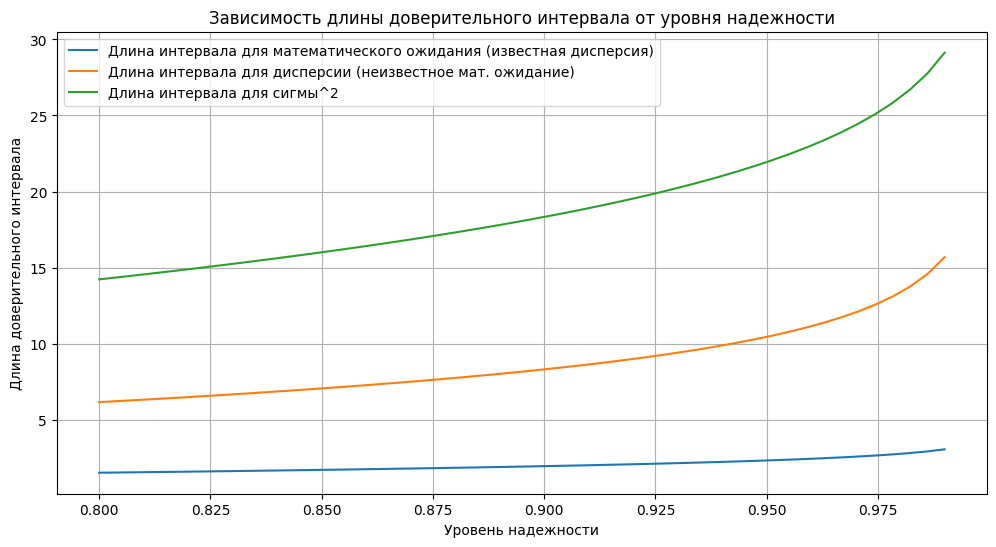

In [179]:
confidence_levels = np.linspace(0.80, 0.99, 50)
interval_lengths_mean_known_variance = []
interval_lengths_variance_unknown_mean = []
interval_lengths_variance = []

for gamma_ in confidence_levels:
    # Для математического ожидания при известной дисперсии, но неизвестном математическом ожидании
    t_gamma_ = stats.norm.ppf((1 + gamma_) / 2)
    error_known_mean_ = t_gamma_ * (std_sigma / np.sqrt(n))
    interval_length_mean_known_variance = 2 * error_known_mean_
    interval_lengths_mean_known_variance.append(interval_length_mean_known_variance)

    # Для дисперсии при неизвестном математическом ожидании
    chi2_lower_ = stats.chi2.ppf((1 - gamma_) / 2, df=n-1)
    chi2_upper_ = stats.chi2.ppf((1 + gamma_) / 2, df=n-1)
    interval_length_variance_unknown_mean = (n - 1) * (std_sample ** 2) * (1/chi2_lower_ - 1/chi2_upper_)
    interval_lengths_variance_unknown_mean.append(interval_length_variance_unknown_mean)

    # Для сигмы^2
    interval_length_variance = chi2_upper_ - chi2_lower_
    interval_lengths_variance.append(interval_length_variance)

plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, interval_lengths_mean_known_variance, label='Длина интервала для математического ожидания (известная дисперсия)')
plt.plot(confidence_levels, interval_lengths_variance_unknown_mean, label='Длина интервала для дисперсии (неизвестное мат. ожидание)')
plt.plot(confidence_levels, interval_lengths_variance, label='Длина интервала для сигмы^2')
plt.xlabel('Уровень надежности')
plt.ylabel('Длина доверительного интервала')
plt.title('Зависимость длины доверительного интервала от уровня надежности')
plt.legend()
plt.grid()
plt.show()

# 3. График зависимости длины доверительного интервала от объема выборки при неизменной надежности

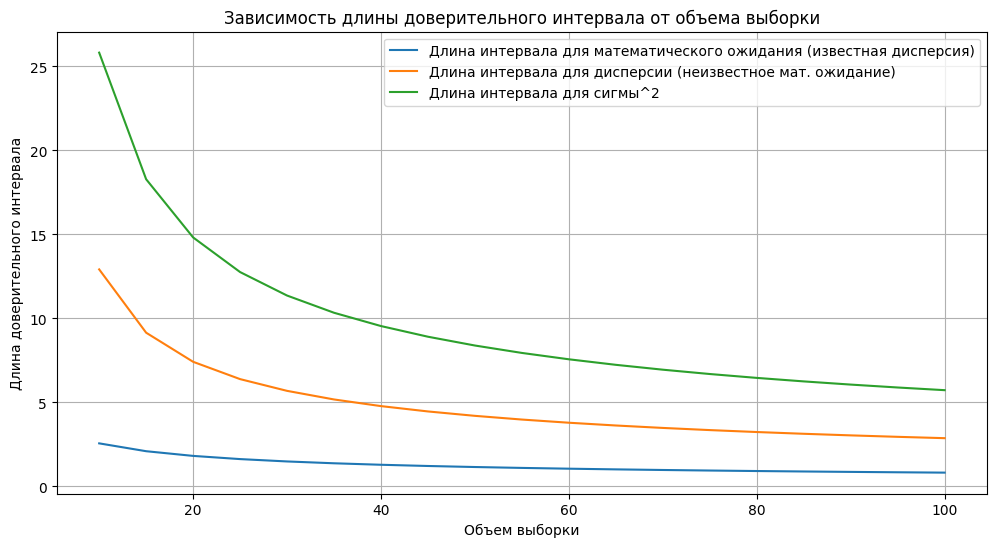

In [180]:
sample_sizes_3 = np.arange(10, 101, 5)
interval_lengths_mean_known_variance_3 = []
interval_lengths_variance_unknown_mean_3 = []
interval_lengths_variance_3 = []

for n_ in sample_sizes_3:
    # Для математического ожидания при известной дисперсии, но неизвестном математическом ожидании
    error_known_mean_ = t_gamma * (std_sigma / np.sqrt(n_))
    interval_length_mean_known_variance = 2 * error_known_mean_
    interval_lengths_mean_known_variance_3.append(interval_length_mean_known_variance)

    # Для дисперсии при неизвестном математическом ожидании
    chi2_lower_ = stats.chi2.ppf((1 - gamma) / 2, df=n_-1)
    chi2_upper_ = stats.chi2.ppf((1 + gamma) / 2, df=n_-1)
    interval_length_variance_unknown_mean = (n_ - 1) * (std_sample ** 2) * (1/chi2_lower_ - 1/chi2_upper_)
    interval_lengths_variance_unknown_mean_3.append(interval_length_variance_unknown_mean)

    # Для сигмы^2
    interval_length_variance = 2 * (n_ - 1) * (std_sample ** 2) * (1/chi2_lower_ - 1/chi2_upper_)
    interval_lengths_variance_3.append(interval_length_variance)

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes_3, interval_lengths_mean_known_variance_3, label='Длина интервала для математического ожидания (известная дисперсия)')
plt.plot(sample_sizes_3, interval_lengths_variance_unknown_mean_3, label='Длина интервала для дисперсии (неизвестное мат. ожидание)')
plt.plot(sample_sizes_3, interval_lengths_variance_3, label='Длина интервала для сигмы^2')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.legend()
plt.grid()
plt.show()

# 4. Построение гистограммы выборки M и наложение на неё плотности нормального распределения

### Переделать

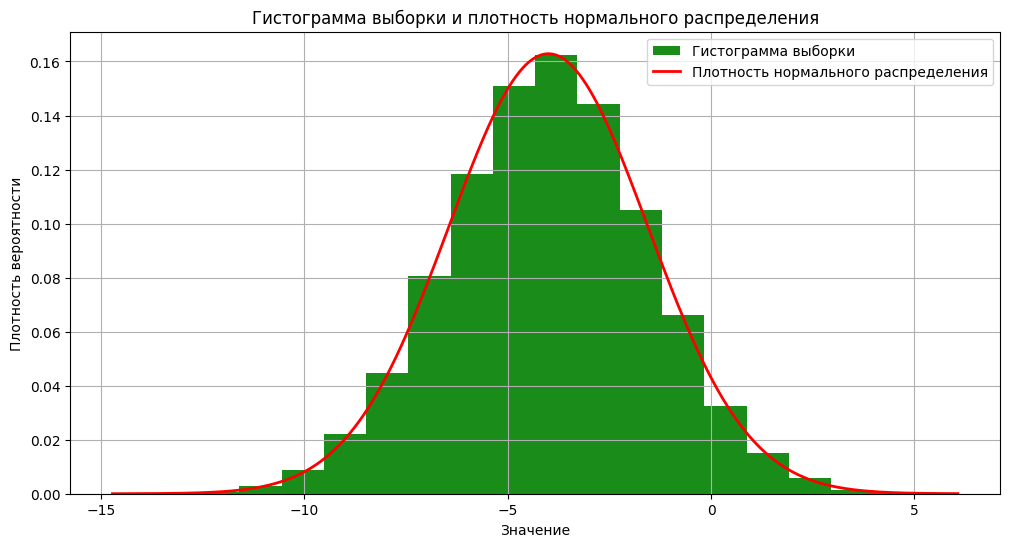

In [181]:
plt.figure(figsize=(12, 6))

all_samples = np.concatenate([np.random.normal(loc=a, scale=std_sigma, size=n) for _ in range(M)])
plt.hist(all_samples, bins=20, density=True, alpha=0.9, color='g', label='Гистограмма выборки')

x = np.linspace(min(all_samples), max(all_samples), 1000)
pdf = stats.norm.pdf(x, loc=a, scale=std_sigma)

plt.plot(x, pdf, 'r-', lw=2, label='Плотность нормального распределения')

plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма выборки и плотность нормального распределения')
plt.legend()
plt.grid()
plt.show()

# 5. Моделирование и анализ случайной величины Z
## 5.1. По каждой из выборок найти значение случайной величины Z

In [182]:
M = 1800
Z_values = []

for _ in range(M):
    sample_m = np.random.normal(loc = a, scale = std_sigma, size = n)
    s2_sample = np.var(sample_m, ddof = 1)
    Z = (n - 1) * s2_sample / sigma2 
    Z_values.append(Z)

## 5.2 Вычисление выборочных числовых характер. случайной величины Z

In [183]:
mean_Z = np.mean(Z_values)
variance_Z = np.var(Z_values, ddof = 1)
median_Z = np.median(Z_values)
curt_Z = stats.kurtosis(Z_values)
std_Z = np.std(Z_values)
print("5.2 Среднее значение Z: ", mean_Z)
print("5.2 Дисперсия Z: \t", variance_Z)
print("5.2 Медиана Z: \t\t", median_Z)
print("5.2 Kurtosis Z: \t", curt_Z)
print("5.2 std Z: \t\t", std_Z)


5.2 Среднее значение Z:  15.963305722662566
5.2 Дисперсия Z: 	 33.34218424360031
5.2 Медиана Z: 		 15.006061509198531
5.2 Kurtosis Z: 	 0.48723314871110324
5.2 std Z: 		 5.772664965846314


## 5.3 Построение гистограммы относительных частот, теоретической кривой распределения Z и её ящичковой диаграммы

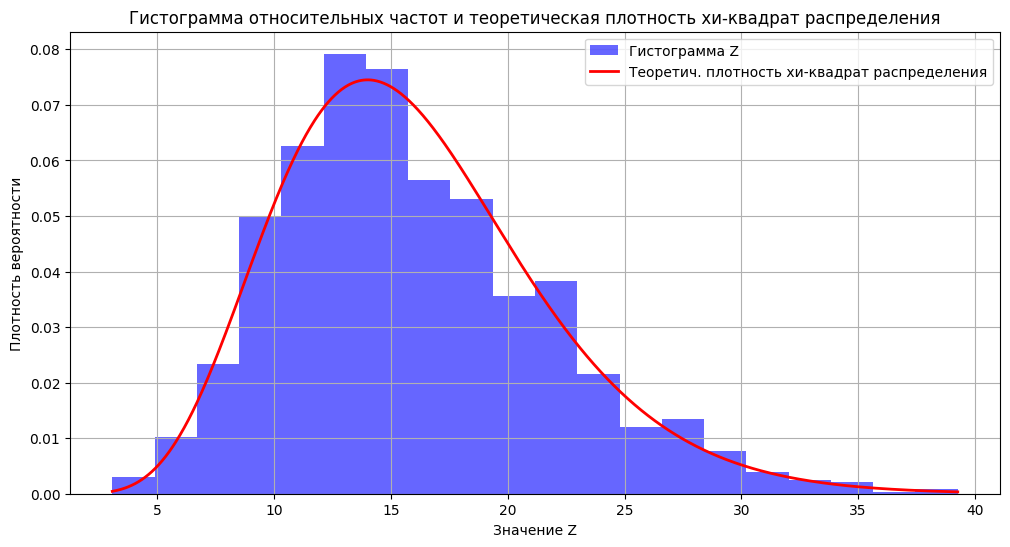

np.float64(0.9999999999999999)

In [184]:
plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(Z_values, bins=20, density=True, alpha=0.6, color='b', label='Гистограмма Z')

x = np.linspace(min(Z_values), max(Z_values), 1000)
pdf_chi2 = stats.chi2.pdf(x, df = n - 1)
plt.plot(x, pdf_chi2, 'r-', lw = 2, label = 'Теоретич. плотность хи-квадрат распределения')

plt.xlabel('Значение Z')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма относительных частот и теоретическая плотность хи-квадрат распределения')
plt.legend()
plt.grid()
plt.show()

sum(count) * (bins[1] - bins[0])

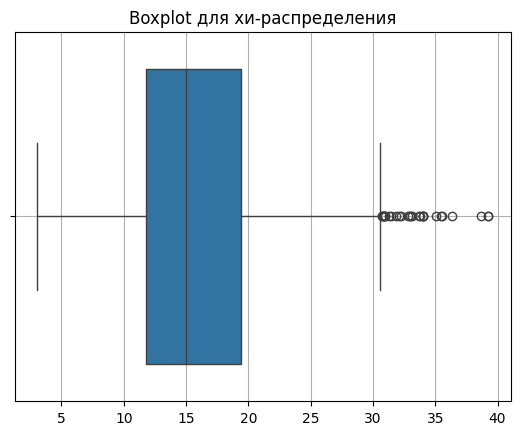

In [189]:
import seaborn as sb
sb.boxplot(x = Z_values)
plt.title('Boxplot для хи-распределения')
plt.grid()
plt.show()